# Decay

Exponential decay of constituents in groundwater describes the gradual reduction in the concentration of dissolved substances in groundwater over time due to natural attenuation processes such as radioactive decay, biodegredation, and hydrolysis. Typically, as groundwater flows through an aquifer, constituents such as contaminants or dissolved solutes may undergo degradation, or other reactive processes. These processes may follow exponential decay kinetics, where the rate of decrease in concentration is proportional to the remaining concentration. As a result, the concentration of constituents diminishes rapidly initially and then gradually approaches a stable, lower level over time. Understanding exponential decay in groundwater is critical for assessing the long-term behavior of contaminants, designing effective groundwater remediation strategies, and safeguarding the quality of groundwater resources.

## 1-st Order Decay

First-order decay is a mathematical model used to describe the exponential decrease in the concentration of a substance over time. It is commonly applied in various fields, including chemistry, physics, biology, and environmental science, to represent processes such as radioactive decay, chemical reactions, and the natural attenuation of contaminants. The mathematics of first-order decay is defined by the following equation:

$$C(t)=C_0 \cdot e^{-\lambda t}$$

Where:

- $C(t)$ represents the concentration of the substance at time $t$.
- $C_0$ is the initial concentration of the substance at $t=0$.
- $\lambda$ is the first-order rate constant, which determines the rate of decay.

Key points about first-order decay:

- Exponential Decrease: The concentration C(t)C(t) decreases exponentially over time. This means that the rate of decrease is proportional to the current concentration, resulting in a continuous, smooth curve that approaches zero but never reaches it completely.

- Rate Constant ($\lambda$): The rate constant $\lambda$ is a positive constant that characterizes the speed of the decay process. It is unique to each specific decay or reaction and is often expressed in units of reciprocal time (e.g., per day, per year). A larger $\lambda$ value indicates a faster decay rate.

- Half-Life: The half-life ($t_{1/2}$) is a valuable parameter associated with first-order decay. It represents the time it takes for the concentration to decrease to half of its initial value ($\frac{C_0}{2}$). The relationship between the rate constant and half-life is given by $t_{1/2}=0.693 \lambda$.

- Independence of Concentration: The rate of decay is independent of the initial concentration $C_0$. This means that substances undergoing first-order decay will always decrease by the same proportion in a given time interval, regardless of their initial concentrations.

## Hydrolysis

Hydrolysis is a chemical reaction in the fate and transport of contaminants in groundwater. It involves the breakdown of certain chemical compounds when they come into contact with water molecules. In the context of groundwater contaminants, hydrolysis can transform hazardous substances into less harmful or more easily degradable forms. This reaction can alter the chemical composition and reactivity of contaminants, affecting their persistence in the subsurface environment. Understanding the occurrence and rate of hydrolysis reactions is crucial for predicting the behavior and potential risks associated with groundwater contaminants, especially for compounds like pesticides and industrial chemicals that are prone to hydrolytic degradation. Contaminant hydrolysis can be a key factor in groundwater remediation strategies and in the assessment of long-term environmental impacts.

While temperature sensitive hydrolysis is typically described using a first-order decay model 

## Electron Transfer

Electron transfer, often referred to as oxidation-reduction (redox) reactions, plays a pivotal role in the fate and transformation of contaminants in groundwater. These reactions involve the exchange of electrons between different chemical species, leading to changes in the oxidation states of the participating compounds. In the context of groundwater contaminants, redox reactions can either facilitate the degradation or transformation of pollutants or, conversely, promote their persistence and mobility. For instance, certain contaminants may undergo reduction reactions, gaining electrons and becoming less toxic or mobile. Conversely, oxidation reactions can render contaminants more mobile or transform them into more harmful forms. Understanding the redox chemistry of groundwater contaminants is crucial for assessing the potential risks, remediation strategies, and long-term behavior of these substances in the subsurface environment. It is a complex yet fundamental aspect of contaminant fate in groundwater systems.

Like hydrolysis electron transfer processes are typically modeled using a first-order decay model.


## Incorporation into ADE

1-st order decay is incorporated into the transport equation as another source/sink term:

$$\frac{\partial C}{\partial t}  =  \frac{\partial}{\partial x} D_x \frac{\partial C}{\partial x} - v_x \frac{\partial C}{\partial x} - \lambda C$$

:::{note}
Obviously other reactions can be included - they simply appear as a source/sink term.  Whether they manifest as simply as the terms herein depends on the nature of the process.  
:::

To modify our existing analytical solutions for 1-st order decay of the species, and a linear equilibrium isotherm (e.g. a constant $R$) we simply have:

$$R\frac{\partial C}{\partial t}  =  \frac{\partial}{\partial x} D_x \frac{\partial C}{\partial x} - v_x \frac{\partial C}{\partial x} - \lambda C$$

We can increase dimensionality as needed (e.g for 3 spatial dimensions):

$$R\frac{\partial C}{\partial t}  =  [\frac{\partial}{\partial x} D_x \frac{\partial C}{\partial x} - v_x \frac{\partial C}{\partial x}]
+ [\frac{\partial}{\partial y} D_y \frac{\partial C}{\partial y} - v_y] + [\frac{\partial}{\partial z} D_z \frac{\partial C}{\partial z} - v_z \frac{\partial C}{\partial z}] - \lambda C$$

We can reuse our already built analytical solutions either by defining parameters as

- $D^*_{i} = \frac{D^~_{i}}{R}$
- $v^*_{i} = \frac{v^~_{i}}{R}$

and use our existing solutions

### 1D Constant Source, Retardation, Decaying Species

For example a 1D prototype function for a constant source from [Wexler, 1989](https://pubs.usgs.gov/of/1989/0056/report.pdf) is:

![](wexler1.png)


In [1]:
#
# prototype decaying species function
#
def c1dadrd(c_source,space,time,dispersion,velocity,retardation,decay):
    from math import sqrt,erf,erfc,exp  # get special math functions
    dee = dispersion/retardation
    vee = velocity/retardation
    uuu = (vee**2 + 4.0*decay*dee)
    uuu = sqrt(uuu)
    arg1 = (space*(vee-uuu))/(2.0*dee)
    arg2 = (space - uuu*time)/(2.0*sqrt(dee*time))
    arg3 = (space*(vee+uuu))/(2.0*dee)
    arg4 = (space + uuu*time)/(2.0*sqrt(dee*time))
    temp1 = c_source/2.0
    temp2 = exp(arg1)
    temp3 = erfc(arg2)
    temp4 = exp(arg3)
    temp5 = erfc(arg4)
    
    c1dadrd = temp1*(temp2*temp3+temp4*temp5)
    
    return c1dadrd

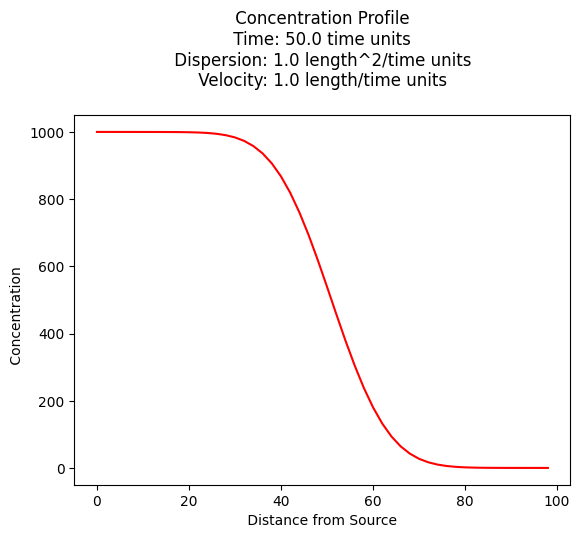

In [2]:
#
# example inputs
#
c_source = 1000.0 # source concentration
space = 100.      # how far in X-direction to extend the plot
time  = 50.       # time since release
dispersion = 1.0 # dispersion coefficient
velocity = 1.0    # pore velocity
retardation = 1.0
decay = 0.00001
#
# forward define and initialize vectors for a profile plot
#
how_many_points = 50   
deltax = space/how_many_points
x = [i*deltax for i in range(how_many_points)] # constructor notation
c = [0.0 for i in range(how_many_points)]      # constructor notation
#
# build the profile predictions
#
for i in range(0,how_many_points,1):
    c[i] = c1dadrd(c_source,x[i],time,dispersion,velocity,retardation,decay)
#
# Import graphics routines for picture making
#
from matplotlib import pyplot as plt
#
# Build and Render the Plot
#
plt.plot(x,c, color='red', linestyle = 'solid')  # make the plot object
plt.title(" Concentration Profile \n Time: " + repr(time) + " time units \n" + " Dispersion: " + repr(dispersion) + " length^2/time units \n" + " Velocity: " + repr(velocity) + " length/time units \n") # caption the plot object
plt.xlabel(" Distance from Source ") # label x-axis
plt.ylabel(" Concentration        ") # label y-axis
#plt.savefig("ogatabanksplot.png") # optional generates just a plot for embedding into a report
plt.show() # plot to stdio -- has to be last call as it kills prior objects
plt.close('all') # needed when plt.show call not invoked, optional here
#sys.exit() # used to elegant exit for CGI-BIN use

## 1D Exponentially decaying source zone, decaying species

We can also implement the concepts of the source zone itself decaying, employing for example a solution by [Marino 1974](https://doi.org/10.1111/j.1752-1688.1974.tb00542.x) our model is:

![](marino74.png)

:::{note}
I have assumed the source decay rate can be different than the species rate, one would need to re-read the original work to determine if that is a correct assumption - given that the solution is a convolution of infinite point sources decaying exponentially at some rate that could concievable by different than the species decay rate the assumption is probably fine.
:::

In [3]:
#
# prototype decaying sourze zone function
#
def c1dadrdsrd(c_source,space,time,dispersion,velocity,retardation,decay,source_decay):
    from math import sqrt,erf,erfc,exp  # get special math functions
    dee = dispersion/retardation
    vee = velocity/retardation
    uuu = (vee**2 + 4.0*decay*dee)
    uuu = sqrt(uuu)
    arg1 = (space*(vee-uuu))/(2.0*dee)
    arg2 = (space - uuu*time)/(2.0*sqrt(dee*time))
    arg3 = (space*(vee+uuu))/(2.0*dee)
    arg4 = (space + uuu*time)/(2.0*sqrt(dee*time))
    temp0 = exp(-source_decay*time)
    temp1 = c_source/2.0
    temp2 = exp(arg1)
    temp3 = erfc(arg2)
    temp4 = exp(arg3)
    temp5 = erfc(arg4)
    
    c1dadrdsrd = temp0*temp1*(temp2*temp3+temp4*temp5)
    
    return c1dadrdsrd

Here's a sample profile plot

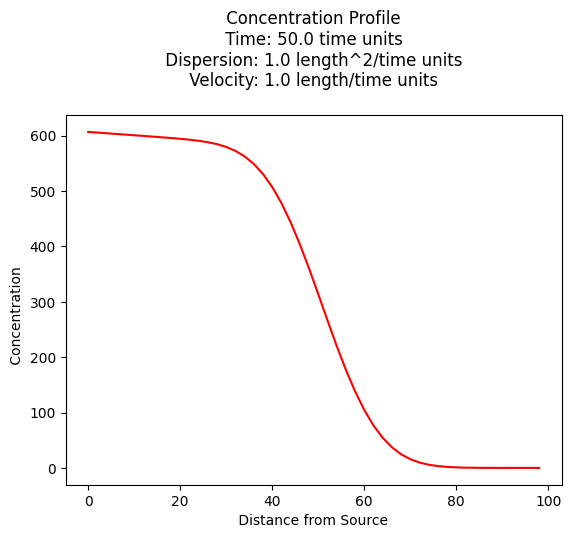

In [4]:
#
# example inputs
#
c_source = 1000.0 # source concentration
space = 100.      # how far in X-direction to extend the plot
time  = 50.       # time since release
dispersion = 1.0  # dispersion coefficient
velocity = 1.0    # pore velocity
retardation = 1.0
decay = 0.001 # species decay rate
decay_s = 0.01 # source zone decay rate (e.g. washout rate)
#
# forward define and initialize vectors for a profile plot
#
how_many_points = 50   
deltax = space/how_many_points
x = [i*deltax for i in range(how_many_points)] # constructor notation
c = [0.0 for i in range(how_many_points)]      # constructor notation
#
# build the profile predictions
#
for i in range(0,how_many_points,1):
    c[i] = c1dadrdsrd(c_source,x[i],time,dispersion,velocity,retardation,decay,decay_s)
#
# Import graphics routines for picture making
#
from matplotlib import pyplot as plt
#
# Build and Render the Plot
#
plt.plot(x,c, color='red', linestyle = 'solid')  # make the plot object
plt.title(" Concentration Profile \n Time: " + repr(time) + " time units \n" + " Dispersion: " + repr(dispersion) + " length^2/time units \n" + " Velocity: " + repr(velocity) + " length/time units \n") # caption the plot object
plt.xlabel(" Distance from Source ") # label x-axis
plt.ylabel(" Concentration        ") # label y-axis
#plt.savefig("ogatabanksplot.png") # optional generates just a plot for embedding into a report
plt.show() # plot to stdio -- has to be last call as it kills prior objects
plt.close('all') # needed when plt.show call not invoked, optional here
#sys.exit() # used to elegant exit for CGI-BIN use

Application of Domenico and Robbin's methodology to extend dimensionality would be reasonable (and is essentially the approach taken by Domenico 1987 that appears in your book as equation 6.33)

## References

1. [Cleveland, T.G. (1998) *Adsorbtion-2* Notes to accompany *"CIVE 7332 Flow and Transport Modeling for Environmental Engineering" at University of Houston*](http://54.243.252.9/ce-5364-webroot/3-Readings/adsorb_2.pdf)
2. [Advection-Dispersion adjusted time from *USGS PHREEQ documentation*](https://wwwbrr.cr.usgs.gov/projects/GWC_coupled/phreeqc/html/final-22.html)
3. [
Analytical solutions for one-, two-, and three-dimensional solute transport in ground-water systems with uniform flow. Open-File Report 89-56](https://pubs.usgs.gov/of/1989/0056/report.pdf)

4. [Marino, M.A. (1974), NUMERICAL AND ANALYTICAL SOLUTIONS OF DISPERSION IN A FINITE, ADSORBING POROUS MEDIUM. JAWRA Journal of the American Water Resources Association, 10: 81-90. ](https://doi.org/10.1111/j.1752-1688.1974.tb00542.x)

5. [M. Th. van Genuchten and W. J. Alves. 1982. Analytical Solutions of the One-Dimensional Convective-Dispersive Solute Transport Equation. U.S. Department of Agriculture, Technical Bulletin No. 1661, 151 p.](http://54.243.252.9/ce-5364-webroot/3-Readings/tb1661.pdf) 

5. [Analytical solutions for one-, two-, and three-dimensional solute transport in ground-water systems with uniform flow
Open-File Report 89-56](https://pubs.usgs.gov/publication/ofr8956)
6. [Analytical solutions for one-, two-, and three-dimensional solute transport in ground-water systems with uniform flow
Techniques of Water-Resources Investigations 03-B7 (supercedes above reference)](https://pubs.usgs.gov/publication/twri03B7)

<!--

Quiz: Chemical Reactions in Groundwater Transport

    What is the difference between fast and slow reactions in groundwater transport?
        Answer: Fast reactions reach equilibrium almost instantly, such as ion exchange or carbonate equilibria, while slow reactions, such as biodegradation or mineral precipitation, occur over longer timeframes and can limit contaminant movement.

    How do reversible reactions affect contaminant mobility in groundwater?
        Answer: Reversible reactions allow contaminants to re-enter the mobile phase under changing conditions, making contaminants more persistent. For example, contaminants can desorb from soil particles back into groundwater.

    Give an example of an irreversible reaction in groundwater transport.
        Answer: The precipitation of metals, such as the reaction of dissolved iron with oxygen to form insoluble iron oxides, is an example of an irreversible reaction, permanently removing the contaminant from the water phase.

    What is a homogeneous reaction in the context of groundwater transport?
        Answer: A homogeneous reaction occurs uniformly in the aqueous phase and involves only dissolved species, such as the dissolution of carbon dioxide in water.

    What distinguishes a heterogeneous reaction from a homogeneous one?
        Answer: A heterogeneous reaction involves multiple phases, typically occurring at the interface between solid and liquid phases, such as adsorption of contaminants onto soil or the reduction of nitrate on mineral surfaces.

    Why are slow reactions significant when considering long-term contaminant transport in groundwater?
        Answer: Slow reactions, such as biodegradation, can cause contaminants to persist for longer periods in groundwater, influencing the size and duration of contaminant plumes and affecting long-term remediation efforts.

    How do surface reactions differ from classical reactions in groundwater systems?
        Answer: Surface reactions occur at solid-liquid interfaces, such as the adsorption of contaminants on mineral surfaces, while classical (bulk) reactions occur uniformly in the aqueous phase, involving only dissolved species.

    What role do fast reactions typically play in modeling groundwater transport?
        Answer: Fast reactions are often assumed to reach equilibrium instantaneously, simplifying models by allowing equilibrium conditions to be applied throughout the system, which helps in predicting contaminant behavior over short timeframes.

    Why are reversible reactions important for understanding contaminant fate during groundwater remediation?
        Answer: Reversible reactions allow contaminants to desorb from soil or mineral surfaces back into groundwater under changing environmental conditions, which can prolong contamination and complicate remediation efforts.

    What factors influence the rate of surface reactions in groundwater systems?
        Answer: Surface reactions are influenced by factors such as the available surface area of the solid phase, the mineral composition of the soil or substrate, and the specific surface chemistry of the interacting materials.

-->